# 罗辑回归神经网络

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py#储存在h5文件中的数据集进行的交互包
import scipy
from PIL import Image
from scipy import ndimage
% matplotlib inline

 接上一章，我们引入猫咪的图片 并把它转换成n*1的矩阵，划分训练集和测试集

In [6]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
np.array(train_dataset) 
#有3类数据

array(['list_classes', 'train_set_x', 'train_set_y'], dtype='<U12')

In [10]:
np.array(train_dataset['train_set_x'][:])#

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [21]:
np.array(train_dataset['train_set_y'][:])#

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
np.array(train_dataset['train_set_x'][:]).shape#209张图片，每个图片长宽为64 厚度为3

(209, 64, 64, 3)

In [16]:
np.array(train_dataset['list_classes'][:])# 是不是猫

array([b'non-cat', b'cat'], dtype='|S7')

In [24]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
#索引0 not cat  索引1 cat
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
#把矩阵shape成n*1 
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

- 下面我们看看图像

y = [1], it's a 'cat' picture.


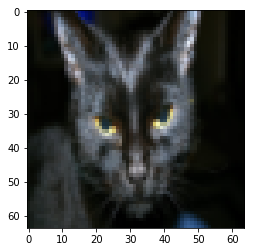

In [49]:
i=25
#for i in range(209):
plt.imshow(train_set_x_orig[i])
print ("y = " + str(train_set_y[:, i]) + ", it's a '" + classes[np.squeeze(train_set_y[:, i])].decode("utf-8") +  "' picture.")


- 我们把所有图片都转换成n*1的矩阵，使他可以作为输入

In [53]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

In [70]:
train_set_x_flatten.T.shape#这个值是（209，64*64*3）=（209，12288）

(209, 12288)

- 图片颜色通道一共三层 红色，绿色，蓝色，因此像素值实际上是三个矢量 范围为0～255. 下面进行标准化，

In [57]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
#这样我们就有了 train_set_x,train_set_y,test_set_x,test_set_y 这样的训练集和测试集

In [69]:
train_set_x.shape #这是输入的的形状，相应的w的形状应该是(1*12288) 然后可以w*X+b这个线性公式，注意不可以X*w+b 。具体原因回顾矩阵乘法

(12288, 209)

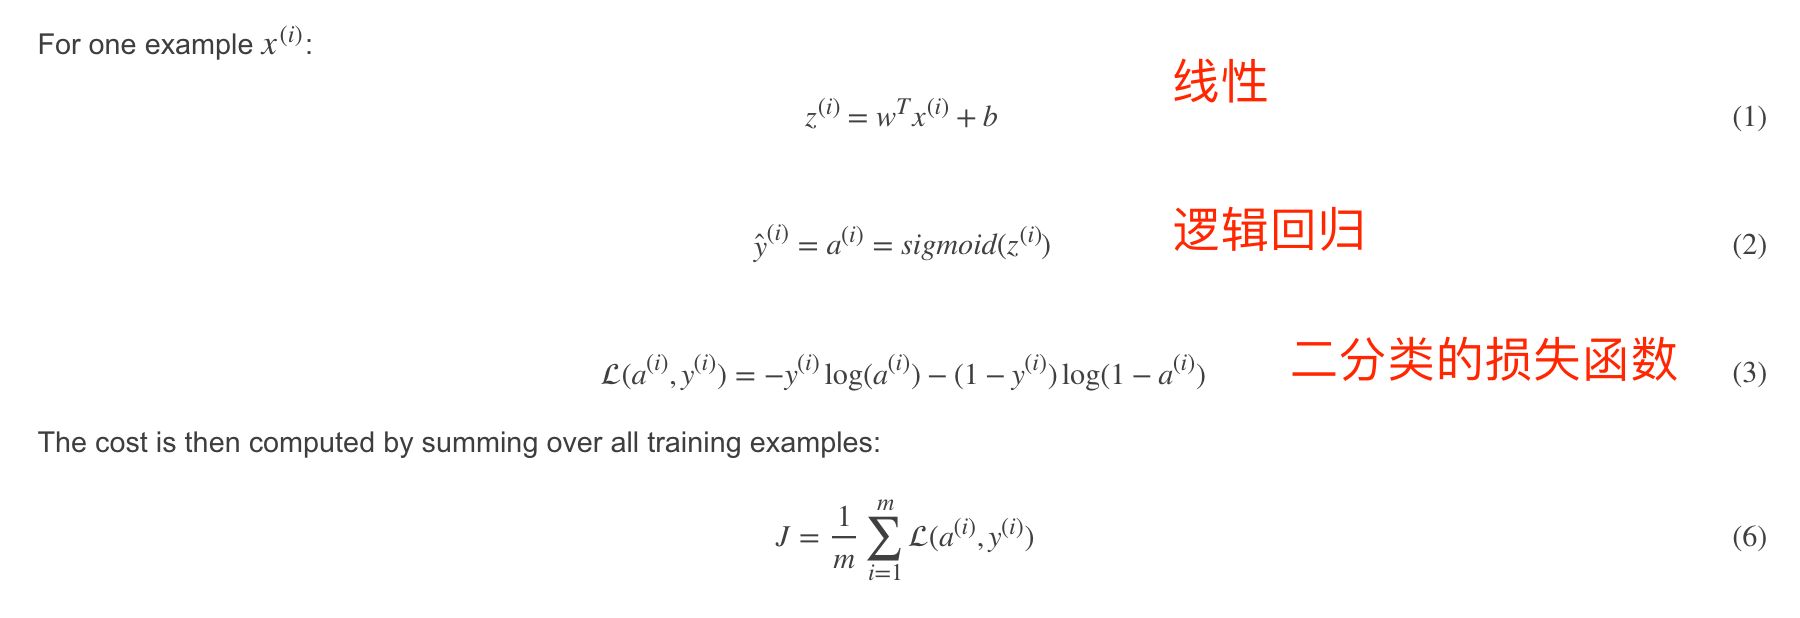

In [58]:

def sigmoid(z):
    s = 1.0/(1+np.exp(-z))
    return s

In [84]:
#初始化参数
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [85]:
#得到损失和梯度
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -(1.0/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw = (1.0/m)*np.dot(X,(A-Y).T)
    db = (1.0/m)*np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost


In [86]:
#梯度下降法
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    #循环多少次
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        #梯度下降得到新的参数
        w = w - learning_rate*dw
        b = b - learning_rate*db
        #每100次添加一下误差值
        if i % 100 == 0:
            costs.append(cost)

        #可以选择是否打印迭代后的误差值（每循环100次）
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


In [87]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    #输出的shape是w.shape[0]*X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction


In [88]:
#融合一下方法，学习率为0.5，循环2000次
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0]) 
    #得到参数，梯度，误差值
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d


In [96]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [98]:
d

{'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0.]]),
 'Y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
         0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
         1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 

y = 1, you predicted that it is a "non-cat" picture.


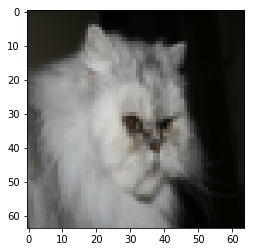

In [111]:
#我们找一张图片测试一下
index = 10
plt.imshow(test_set_x[:,index].reshape((64,64, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(np.squeeze(d["Y_prediction_test"][0,index]))].decode("utf-8")+  "\" picture.")
#错误结果

y = 1, you predicted that it is a "cat" picture.


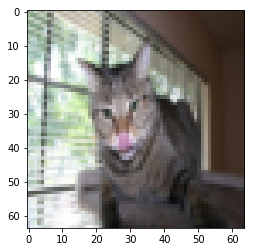

In [114]:
index = 20
plt.imshow(test_set_x[:,index].reshape((64,64, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(np.squeeze(d["Y_prediction_test"][0,index]))].decode("utf-8")+  "\" picture.")
#正确结果

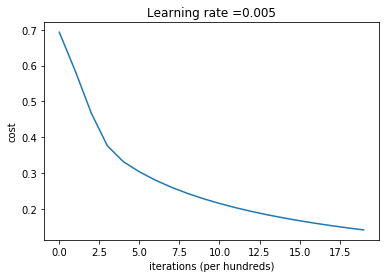

In [115]:
#绘制成本曲线
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



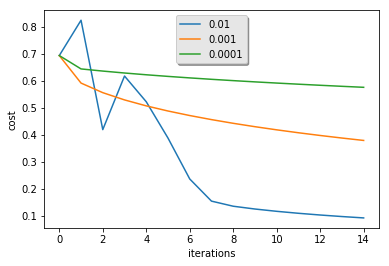

In [116]:
#学习率选择
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
